# Employee Performance Analysis

### Importing necessary Libraries

In [45]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from pandasql import sqldf

sql = lambda q: sqldf(q, globals())
init_notebook_mode(connected=1)
cf.go_offline()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Importing data

In [44]:
df=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [3]:
df.shape

(1200, 28)

In [4]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [6]:
#converting the datatype of column as int ,so that we can perform filter operations
df['PerformanceRating'] = df['PerformanceRating'].astype('int64')

## Impact of Age on Performance

### Univariate Analysis

#### 1.Histogram

In [7]:
px.histogram(df,x='Age',title='Distribution of Age',nbins=100)

#### 2. Boxplot

In [8]:
px.box(df,x='Age',title='Box Plot for Age Distribution')

##### Inference:
   From above __Histogram and box plot__ we can conclude that the Age of Most of the employee are between __30-43__

### Bi or Multivariate Analysis

#### Age Specific Analysis W.R.T PerformanceRating

In [9]:
#Grouping performance rating based on age to check the overall performance of each age 
age_df=sql('select Age,PerformanceRating,sum(PerformanceRating),count(PerformanceRating),avg(PerformanceRating) as Average_Performance_Rating from df group by Age')
px.scatter(age_df,x='Age',y='Average_Performance_Rating',trendline='ols',title='Age-wise Performance of Employees')


#### Performance Analysis on Different Age Group

In [10]:
#Creating Age Group, to check the which age group performes well
def age_group(row):
    if(18<=row<=30):
        return '18-30 years'
    elif(31<=row<=40):
        return'31-40 years'
    elif(41<=row<=50):
        return'41-50 years'
    elif(51<=row<=60):
        return'51-60 years'
    
df['Age_Group']=df['Age'].apply(lambda row:age_group(row))

In [11]:
agegroup_df=sql('select Age_Group,PerformanceRating,sum(PerformanceRating),count(PerformanceRating),avg(PerformanceRating) as Average_Performance_Rating from df group by Age_Group')
px.histogram(agegroup_df,x='Age_Group',y='Average_Performance_Rating',color='Age_Group',title='Age Group VS Performance Rating').update_yaxes(tick0=0.75, dtick=0.1)


##### Inference
1. From the above Scatter plot we can clearly see the performance of the Employees are decreasing with increase in Age.
2. Age Group 18-30 Performs better when compared to other Age groups

 ---------------------------------------------------------------------------------------------------------------------                

## Impact of Distance from Home on Performance

### Univariate Analysis

####  1.Histogram

In [12]:
px.histogram(df,x='DistanceFromHome',title='Distribution of DistanceFromHome (Distance B/W Office and Home)',nbins=100)

#### 2.Violin plot

In [13]:
px.violin(df,x='DistanceFromHome',title='Violin Plot for DistanceFromHome Distribution')

##### Inference
Employees resides as close as 1 km from office and as far as 29kms from office

Most of employees resides 2 to 14 kms away from office. 

### 2.Bivariate Analysis

##### How DistanceFromHome affects performance of Employee?

#### Scatterplot

In [14]:
distancefromhome = sql('select DistanceFromHome,PerformanceRating from df order by DistanceFromHome')
distancefromhome_df=pd.pivot_table(distancefromhome,values='PerformanceRating',index='DistanceFromHome',aggfunc='mean')
distancefromhome_df.reset_index(inplace=True)
px.scatter(distancefromhome_df,x='DistanceFromHome',y='PerformanceRating',trendline='ols',title='Relationship B/W DistanceFromHome and PerformanceRating')

#### Inference                    
   From the Above Scatterplot we can clearly see the __Performance of the employee decreases__ when __distance between home and office increases__

#### What is the Ideal Distance between office and home for better work Performance?

In [15]:
def distance_group(row):
    if(1<=row<=5):
        return '1-5Kms'
    elif(6<=row<=10):
        return'6-10kms'
    elif(11<=row<=15):
        return'11-15kms'
    elif(16<=row<=20):
        return'16-20kms'
    elif(21<=row<=25):
        return'21-25kms'
    elif(26<=row<=30):
        return'26-30kms'
    
df['Distance_group']=df['DistanceFromHome'].apply(lambda row:distance_group(row))

In [16]:
distancefromhome_df2 = sql('select Distance_group,AVG(PerformanceRating) as PerformanceRating  from df group by Distance_group order by AVG(PerformanceRating) desc')
px.line(distancefromhome_df2,x='Distance_group',y='PerformanceRating',text='PerformanceRating',title='Relationship B/W Distance Group and PerformanceRating')

##### Inference:
   For Better Work Performance, __Employees should reside within 5kms radius from office__.
    
   Trend seems to be in negative way. Therefore __Increase in Distance will definitely decrease the Performance of Employee__

 ---------------------------------------------------------------------------------------------------------------------                

## Impact of Education Level on Employee Performance

### Univariate Analysis

In [17]:
def Education_category(row):
    if( row ==1):
        return 'Below College'
    elif (row ==2):
        return 'College'
    elif (row ==3):
        return 'Bachelor'
    elif (row ==4):
        return 'Master'
    elif (row ==5):
        return 'Doctor'

In [18]:

df['Education_Category']= df['EmpEducationLevel'].apply(lambda x: Education_category(x))
                                                        

#### 1.Histogram

In [19]:
empedulvl_df= sql('select EmpEducationLevel,Education_Category,count(Education_Category) as count from df group by Education_Category order by EmpEducationLevel ')
px.histogram(empedulvl_df,x='Education_Category',y='count',title='Distribution of EmpEducationLevel')

#### 2.Pie chart

In [20]:
distribution = df['Education_Category'].value_counts()
empedulvl_df2 = pd.DataFrame(distribution).reset_index()
empedulvl_df2.columns=['Education_Category','Count']
px.pie(empedulvl_df2,values='Count',names='Education_Category',title='Educational Qualification of Employees in the Organization')
empedulvl_df2['Percentage']=round((empedulvl_df2['Count'] / empedulvl_df2['Count'] .sum())*100,2)
empedulvl_df2

,Education_Category,Count,Percentage
0,Bachelor,449,37.42
1,Master,322,26.83
2,College,239,19.92
3,Below College,148,12.33
4,Doctor,42,3.50


##### Inference
1. 1/3rd of Employees holds bachelor level of Education
2. Master and college level education collectively have 46.7% of share in the organization
3. Below college and Docterate fills the remains 15% of the Organization

### 2.Multi Variate Analysis

####    1.Which Education Category does most of our Employee belongs to?
####    2. Is there any relationship between Educationlevel and Hourly pay?
####    3. Which Category(Education Level based) of Employee have the best Performance Rating?
####    4. Does Age have impact on Hourly pay and Performance of the Employee?


In [21]:
#Dataframe which depicts how the above mentioned columns are related

empedulvl_df3= sql('select EmpEducationLevel,Education_Category,AVG(EmpHourlyRate) as Average_Hourly_Pay,AVG(PerformanceRating) as Average_Performance_Rating, AVG(Age) as Average_Age from df group by Education_Category order by EmpEducationLevel ')
empedulvl_df3

,EmpEducationLevel,Education_Category,Average_Hourly_Pay,Average_Performance_Rating,Average_Age
0,1,Below College,65.162162,2.871622,32.114865
1,2,College,66.472803,2.949791,37.108787
2,3,Bachelor,65.581292,2.986637,36.536748
3,4,Master,66.403727,2.937888,39.065217
4,5,Doctor,67.119048,2.880952,40.380952


In [22]:
px.scatter_3d(sql('select EmpEducationLevel,Education_Category,AVG(EmpHourlyRate) as Average_Hourly_Pay,AVG(PerformanceRating) as Average_Performance_Rating from df group by Education_Category order by EmpEducationLevel '),
           x='Education_Category',y='Average_Hourly_Pay',z='Average_Performance_Rating',height=1000,width=900)

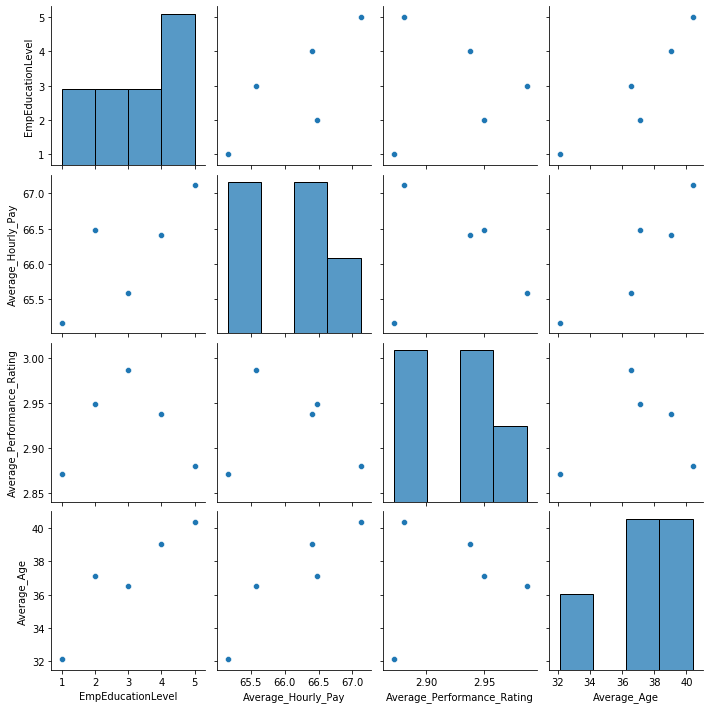

In [23]:
sns.pairplot(empedulvl_df3)

### Inference:
   __Employees__ who have studied __below college level are paid low__.
   
   __Doctorates__ are __highly paid__ in this organization __but__ their __Performance Rating__ is too low. __Average Age of Doctorates__ is around __40__. which is __one of the main reason for poor work Performance__
   
   __Bachelors__ have __High Performance Rating__ in the Organization
   
   __Increase in Age increases Hourly pay__ but __decreases__ the __Performance of the Employees__

 ---------------------------------------------------------------------------------------------------------------------                

## Impact of Employee Environment Satisfaction on Performance Rating

#### 1. Bar Plot to show performance Ratings W.R.T Environment Satisfaction

In [24]:
px.bar(sql('''select EmpEnvironmentSatisfaction,PerformanceRating,count(*) as count from df group by EmpEnvironmentSatisfaction,PerformanceRating''')
,x='PerformanceRating',y='count',facet_col='EmpEnvironmentSatisfaction',title='Impact of Environment Satisfaction on Performance')


#####  2. Average Performance Rating based on Environment Satisfaction

In [25]:
empenv_df = sql('''select EmpEnvironmentSatisfaction,PerformanceRating,count(*) as count from df group by EmpEnvironmentSatisfaction,PerformanceRating''')
empenv_df['Total_Rating']=empenv_df['PerformanceRating']*empenv_df['count']

In [26]:
empenv_df2 = sql('select EmpEnvironmentSatisfaction,sum(count) as No_of_Employee,sum(Total_Rating) as Sum_of_Ratings from empenv_df group by EmpEnvironmentSatisfaction')
empenv_df2['Average_Rating']=empenv_df2['Sum_of_Ratings'] /empenv_df2['No_of_Employee']

px.scatter(empenv_df2,x='EmpEnvironmentSatisfaction',y='Average_Rating',trendline='ols',title='Impact of Environment Satisfaction on Performance')

#### Inference->

 1.The Employees who are having __higher satisfaction__ tends to __have better Performance Rating__ than __employee who have less satisfaction__ .
 
 2.Higher the satisfaction, higher the work performance and vice-versa`

 ---------------------------------------------------------------------------------------------------------------------                

## Impact of Employee Job Satisfaction 

### 1. On Attrition Rate

In [27]:
px.bar(sql('select EmpJobSatisfaction,Attrition,Gender,count(*) as count from df group by EmpJobSatisfaction,Attrition,Gender'),
       color='Gender',x='Attrition',y='count',facet_col='EmpJobSatisfaction' ,title='Impact of Job Satisfaction on Attrition')

#### Inference
        1. From the Above Bar plot we can clearly see the Attrition Rate decreases with increase in Job Satisfaction 
        2. Attrition Rate is higher when the Employee have less Job Satisfaction

### 2. On Performance Rating

In [28]:
px.bar(sql('select EmpJobSatisfaction,PerformanceRating,Gender,count(*) as count from df where PerformanceRating in (3,4)  group by EmpJobSatisfaction,PerformanceRating,Gender'),
       color='Gender',x='PerformanceRating',y='count',facet_col='EmpJobSatisfaction',range_x=[3,4],range_y=[0,300],title='Impact of Job Satisfaction on Performance')

#### Inference
        1. From the Above Bar plot we can clearly see the Performance Rating Increases with increase in Job Satisfaction 
        2. Performance of the Employee is higher when the Employee have Job Satisfaction

 ---------------------------------------------------------------------------------------------------------------------                

## Impact of Overtime on Performance Rating

### Univariate Analysis

#### 1.Bar Plot

In [29]:
overtime_df= sql('select Gender,OverTime,count(*) as count from df group by OverTime,Gender')
px.bar(overtime_df,x='OverTime',y='count',facet_col='Gender',text='count') 

#### 2. Pie Chart

In [30]:
overtime_df2=sql('''select Gender,OverTime,count(*) as count from df where OverTime='Yes' group by Gender ''')
px.pie(overtime_df2, values='count',names='Gender',hole=0.3)

#### Inference from Above Plots:

   __No.of.Men__ who does Overtime is __higher__ than __No.of.Women__

### Multi Variate Analysis

##### 1. Does Overtime affects Performance rating ??

In [31]:
overtime_df3= sql('select Gender,OverTime,avg(PerformanceRating) as PerformanceRating,count(*) as count from df group by OverTime,Gender')
px.bar(overtime_df3,y='OverTime',x='PerformanceRating',facet_row='Gender',text='PerformanceRating').update_yaxes(tick0=0.75, dtick=0.1)

#### Inference:
   It is Evident that Overtime increases the Performance of the Employee. Though the Number of women who are doing overtime is less when compared to men, but Performance Rating is higher than men who does overtime

#### 2. Overtime may increase the Performance of Employee but Will it affect Employee's psycology??? Does Frequent Overtime work forces Employee to resign from the Organization?

In [32]:
overtime_df4 = sql('select Overtime,AVG(EmpWorkLifeBalance) as EmpWorkLifeBalance,Attrition from df group by Overtime,Attrition order by EmpWorkLifeBalance')
print(overtime_df4)
fig1=px.bar(overtime_df4,y='OverTime',x='EmpWorkLifeBalance',facet_row='Attrition').update_yaxes(tick0=0.5, dtick='L0.5')

fig2=px.scatter(overtime_df4,x='OverTime',y='EmpWorkLifeBalance',color='Attrition')
fig1.show()
fig2.show()

  OverTime  EmpWorkLifeBalance Attrition
0       No            2.573171       Yes
1      Yes            2.677083       Yes
2      Yes            2.727626        No
3       No            2.776471        No


##### Inference: 
    From Above plots we can consider that Overtime is one of the main reason for Attrition.
    Increase in overtime definitely affects the worklike places of the employees.
    Employees who are staying in current organization have better worklife balance than the employees who left the organization

 ---------------------------------------------------------------------------------------------------------------------                

## Impact of Salary Hike on Performance Rating

### Univariate Analysis

#### 1.Histogram

In [33]:
px.histogram(df,'EmpLastSalaryHikePercent',nbins=29)

#### 2. Pie

In [34]:
px.pie(df,values='EmpLastSalaryHikePercent',title='Employee Hike Distribution Chart',names='EmpLastSalaryHikePercent')

## 2.Multivariate Analysis

In [35]:
hike_df= sql('select EmpLastSalaryHikePercent,Age_Group,avg(PerformanceRating) as Average_Performance_Rating,count(*) as count from df group by EmpLastSalaryHikePercent,Age_Group')
hike_df.head()

,EmpLastSalaryHikePercent,Age_Group,Average_Performance_Rating,count
0,11,18-30 years,2.847826,46
1,11,31-40 years,2.828571,70
2,11,41-50 years,2.852941,34
3,11,51-60 years,2.842105,19
4,12,18-30 years,2.787879,33


In [36]:
px.scatter(hike_df,
           x='EmpLastSalaryHikePercent',
           y='Average_Performance_Rating',
           facet_row='Age_Group',
           trendline='ols',
           title='Impact of Salary Hike on Performance',height=1500)

#### Inference
From the Above Plot we can confirm that the Increase in salary hike increases the performance of the employee
if the employee is below 50 years

#### To have better understanding over the Above plot 
Let's group Age's as Below 50 and Above 50 for better Understanding

In [37]:
def below_above_50_classification(row):
    if(row=='51-60 years'):
        return 'Above 50'
    else:
        return 'Below 50'
    
hike_df['Above_Below_50years'] = hike_df['Age_Group'].apply(lambda row:below_above_50_classification(row))
hike_df.head()

,EmpLastSalaryHikePercent,Age_Group,Average_Performance_Rating,count,Above_Below_50years
0,11,18-30 years,2.847826,46,Below 50
1,11,31-40 years,2.828571,70,Below 50
2,11,41-50 years,2.852941,34,Below 50
3,11,51-60 years,2.842105,19,Above 50
4,12,18-30 years,2.787879,33,Below 50


In [38]:
px.scatter(hike_df,
           x='EmpLastSalaryHikePercent',
           y='Average_Performance_Rating',
           color='Above_Below_50years',
           trendline='ols',
           title='Impact of Salary Hike on Performance Above/Below 50 Years')

#### Inference: 
   __Interesting finding!!! . The Performance of the Employees who are aged above 50 decreases when they get Higher Salary Hike__

## Impact of work life Balance on Performance

In [39]:
worklife_df = sql('select EmpWorkLifeBalance,AVG(PerformanceRating) as PerformanceRating  from df group by EmpWorkLifeBalance')
worklife_df

,EmpWorkLifeBalance,PerformanceRating
0,1,2.750000
1,2,2.918367
2,3,2.950481
3,4,3.121739


In [40]:
px.line(worklife_df,x='EmpWorkLifeBalance',y='PerformanceRating',title='Worklife Balance VS Performance Rating')

#### Inference:
    Trend is in Upward Direction.We can confirm that Increase in worklife balance increases the Performance of Employees

### How ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager affects the Performance of Employee?

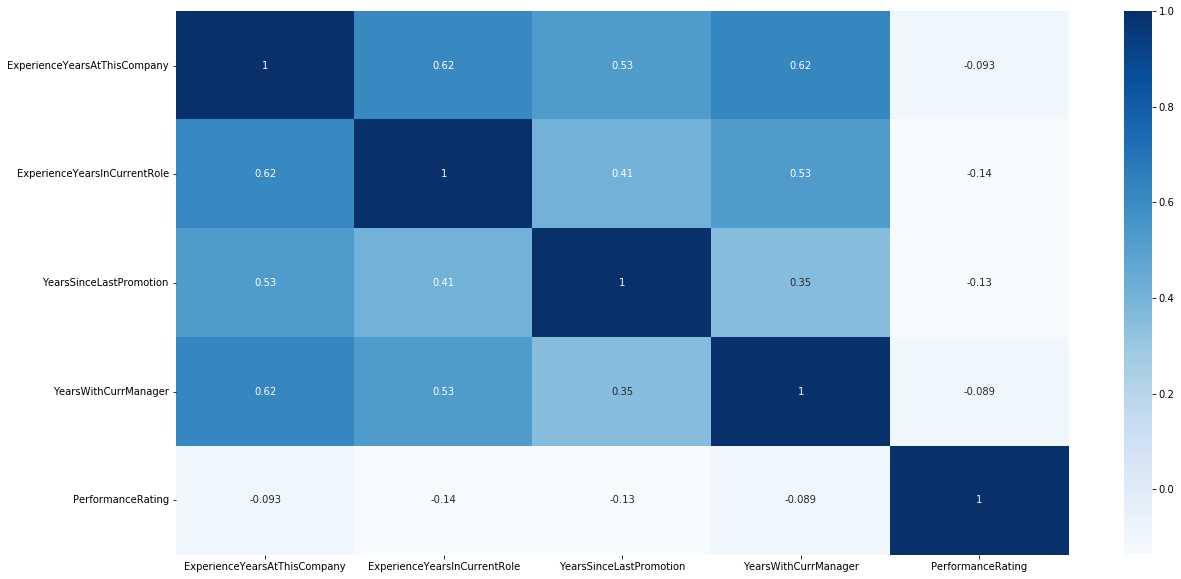

In [41]:
temp_df = sql('select  ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager,AVG(PerformanceRating) as PerformanceRating from df group by ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager')
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(temp_df.corr(),ax=ax,cmap='Blues',annot=True)

#### Inference:
   The columns __ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager__ are __highly co-related__ with each other, which __leads to Multi-Collinearity__
   
   The above mentioned columns have __Negative Co-relation with target variable__,from which we can conclude that __increase in values__ from above column __decreases the Performance of the Employees__

# Conclusion

1.Age Group 18-30 Performs better when compared to other Age groups	

2.For Better Work Performance, Employees should __reside within 5kms radius__ from office .

3.__Doctorates__ are __highly paid__ in this organization __but__ their __Performance Rating__ is too low. __Average Age of Doctorates__ is around __40__. which is __one of the main reason for theirpoor work Performance__

4._Bachelors__ have __High Performance Rating__ in the Organization. Increasing their Salary will boost the Performance of the Organization

5.Environment Satisfaction plays huge role in employee Performance.

6.Attrition Rate decreases with increase in Job Satisfaction .

7.__Increase in Salary Hike__ for Employees __below 50 years__ have __positive impact on Performance__, 
but Strangely __increase in salary__ for employees __above 50 years decreases their Performance__.

8.Increase in Worklife Balance plays vital role in Employee Performance

9.Overtime increases Performance of the Employees but it's one of the main reason for Attrition.

10.Increase in
        Employee in company
        No role change
        Delayed Promotions
        Working under same Manager
    decreases the Performance of the Employees.
    
11.Performance of the Employee decreases when Employee experience increases.

12.Employee Performance decreases when he/she works in a same role for longer period of time

13.Delayed Promotions causes frustration among the employees thereby decreases the Performance of the employees

14.Performance of employees decreases when he/she working under same Manager for longer period of time.

# Kindly have a look on Tableau DashBoard for the above Analysis :-)

https://public.tableau.com/app/profile/the.innovative.coder/viz/EmployeeDashBoard/Dashboard3?publish=yes


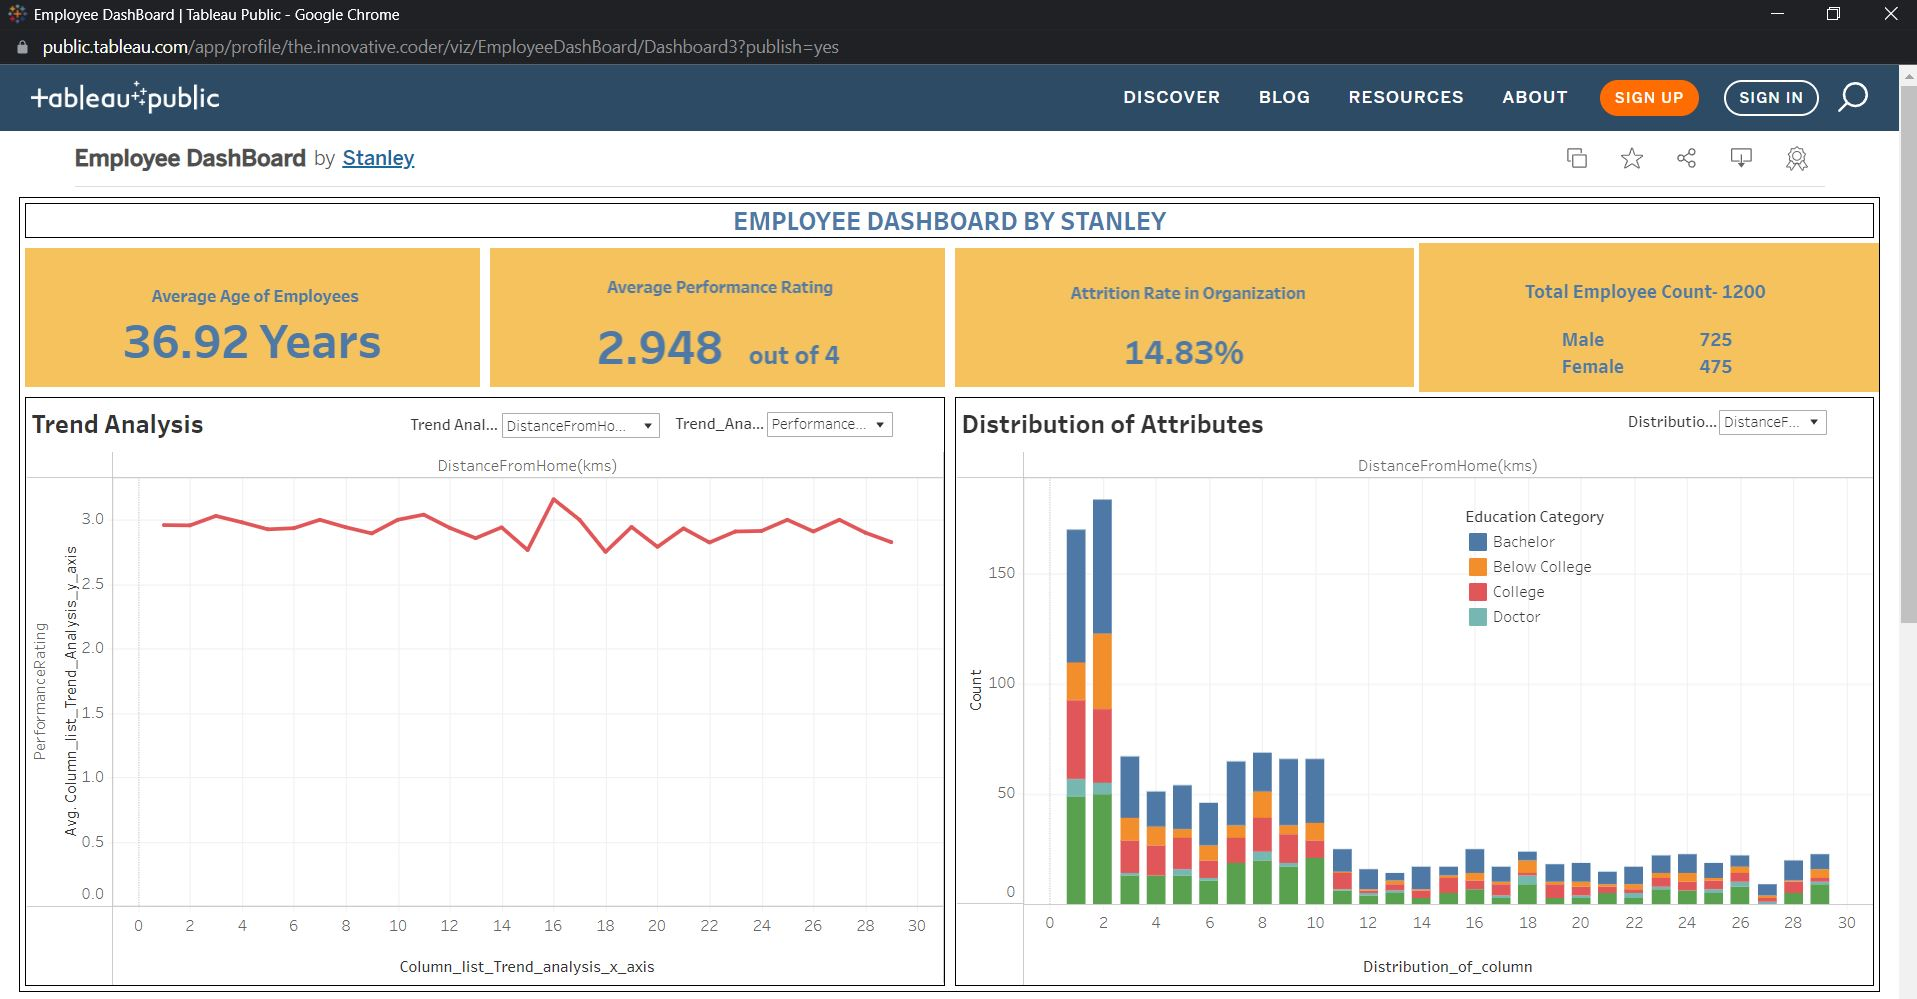